<a href="https://colab.research.google.com/github/IkhsanNugroho/Machine-Learning/blob/main/Week81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machines (SVM)**teks tebal**

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

Example of SVM Classification: **Maximum Margin Separating Hyperplane Programs**

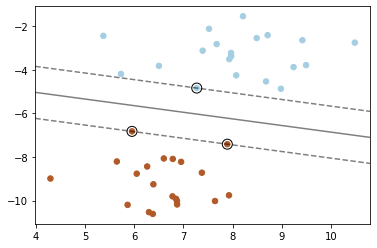

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

**Credit card dataset: SVM Classification**

In [2]:
# Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [3]:
# Reading the file .csv
data = pd.read_csv('creditcard.csv') 
# Converting data to Panda DataFrame
df = pd.DataFrame(data) 
# Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,43664.00000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,...,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43664.000000,43663.000000,43663.000000,43663.000000,43663.000000
mean,26888.25284,-0.233273,0.031606,0.700508,0.191731,-0.243618,0.099239,-0.117611,0.051499,0.173603,...,-0.026792,-0.110075,-0.039981,0.009712,0.136448,0.022633,0.006871,0.005107,90.313927,0.003069
std,12814.99066,1.881487,1.614103,1.524287,1.407338,1.409001,1.310495,1.272765,1.214443,1.226176,...,0.739609,0.637124,0.568360,0.592318,0.437462,0.503349,0.390445,0.342269,238.441952,0.055314
min,0.00000,-56.407510,-72.715728,-32.454198,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-8.507059,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,18719.75000,-0.980241,-0.538882,0.225681,-0.715653,-0.848251,-0.637897,-0.599128,-0.149257,-0.579444,...,-0.233410,-0.530920,-0.179112,-0.321968,-0.128037,-0.329466,-0.063372,-0.006848,7.570000,0.000000
50%,31883.00000,-0.244783,0.091807,0.804944,0.190472,-0.277415,-0.155863,-0.072568,0.053267,0.053757,...,-0.072254,-0.084865,-0.051512,0.062302,0.175968,-0.066830,0.008647,0.021761,24.890000,0.000000
75%,36950.00000,1.158119,0.740709,1.437905,1.071096,0.290816,0.486612,0.431337,0.322613,0.881798,...,0.104877,0.302064,0.077031,0.401497,0.421923,0.303412,0.084707,0.076353,81.555000,0.000000
max,41600.00000,1.960497,17.930550,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


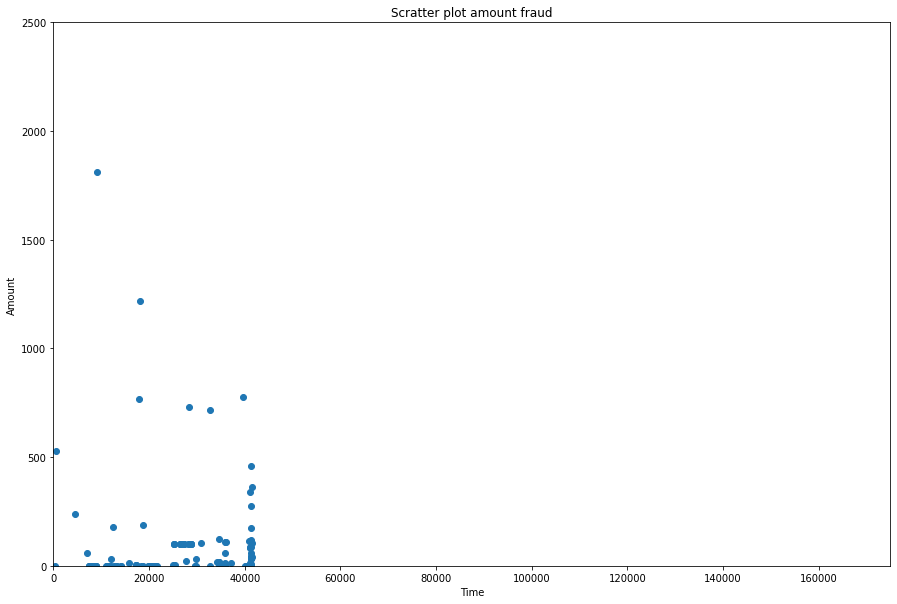

In [4]:
# Data Visualization
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [5]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 2 frauds where the amount was bigger than 1000 over 134 frauds


In [6]:
# Unbalence data
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset')

There are only 134 frauds in the original dataset, even though there are 43529 no frauds in the dataset


In [7]:
# Achieve the best accuracy possible it would most likely label every transaction as a non-fraud
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


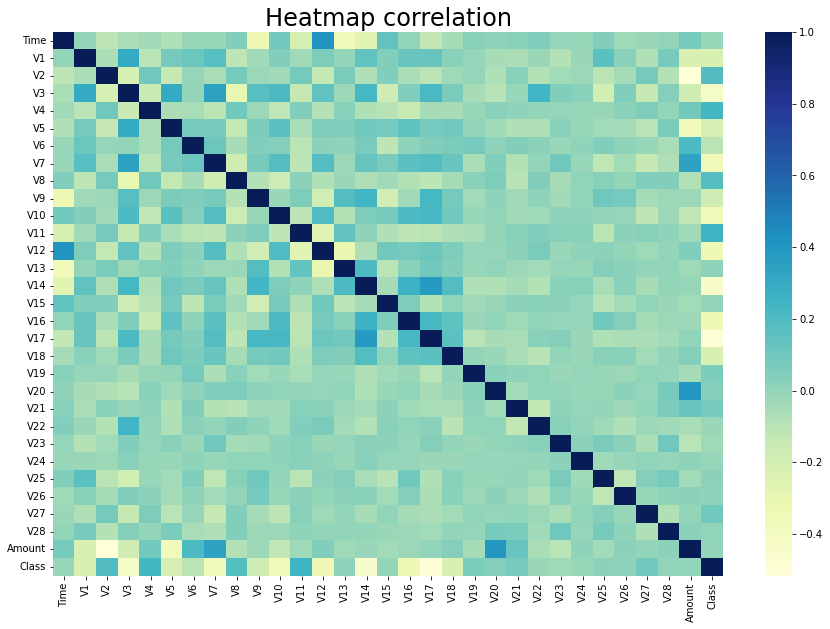

In [8]:
# Correlation of the features
# Calculation of the correlation coefficients in pairs, with the default method:
# Pearson, Standard Correlation Coefficient
df_corr = df.corr() 

plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [9]:
# Most of the features are not correlated with each other
# PCA was previously performed on the data

# Retrieving the correlation coefficients per feature in relation to the feature class
rank = df_corr['Class'] 
df_rank = pd.DataFrame(rank) 

# Ranking the absolute values of the coefficientsin descending order
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) 

# Removing Missing Data (not a number)
df_rank.dropna(inplace=True)

In [10]:
# We seperate ours data in two groups : a train dataset and a test dataset

# Build our train dataset
# Cut in two the original dataset
df_train_all = df[0:150000] 

# Seperate the data which are the frauds and the no frauds
df_train_1 = df_train_all[df_train_all['Class'] == 1] 
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)

# Gather the frauds with the no frauds.
df_train = df_train_1.append(df_sample)  
# Mix dataset
df_train = df_train.sample(frac=1)

In this dataset, we have 134 frauds so we need to take a similar number of non-fraud


In [11]:
# Drop the features Time (useless), and the Class (label)
X_train = df_train.drop(['Time', 'Class'],axis=1)

# Create our label
y_train = df_train['Class'] 
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [12]:
# With all the test dataset to see if the model learn correctly 
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [13]:
# Define training and testing set after applying a dimension reduction 
# Take the first ten ranked features
X_train_rank = df_train[df_rank.index[1:11]] 
X_train_rank = np.asarray(X_train_rank)

X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [14]:
# Confusion Matrix
# Binary label, Class = 1 (fraud) and Class = 0 (no fraud)
class_names=np.array(['0','1'])

In [15]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
# Model Selection
# Set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)
classifier = svm.SVC(kernel='linear') 

# Then we train our model, with our balanced data train.
classifier.fit(X_train, y_train)

SVC(kernel='linear')